

# Clustering using the k-means clustering algorithm

## Dataset: Colleges and universities

This notebook shows how to use the k-means clustering algorithm to cluster a dataset of 49 colleges and universities into 4 groups.

The workflow is as follows:

1. Data preparation
    * convert categorical variables to numerical
    * normalize all features  
2. Clustering
    * use KMeans from sklearn.cluster
3. Visualize results
    * use matplotlib

## Import packages

In [1]:
#Data preparation
import numpy as np
import pandas as pd

#Clustering
from sklearn.cluster import KMeans

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Load dataset

In [2]:
#load dataset
df = pd.read_csv('Colleges_and_uni.csv')
df.head()

,School,Type,Median_SAT,Acceptance_Rate,Expenditures_Student,Top_10%_HS,Graduation_%
0,Amherst,Lib Arts,1315,22%,"$26,636",85,93
1,Barnard,Lib Arts,1220,53%,"$17,653",69,80
2,Bates,Lib Arts,1240,36%,"$17,554",58,88
3,Berkeley,University,1176,37%,"$23,665",95,68
4,Bowdoin,Lib Arts,1300,24%,"$25,703",78,90


## Explore dataset
### Data types

To use the k-means clustering algorithms, all variables must be numerical.
DataFrame.dtypes returns a series with the data type of each column in the dataset.

In [110]:
df.dtypes

School                  object
Type                    object
Median_SAT               int64
Acceptance_Rate         object
Expenditures_Student    object
Top_10%_HS               int64
Graduation_%             int64
dtype: object

The number of rows and columns in the dataset can be found with DataFrame.shape:

In [111]:
df.shape

(49, 7)

As seen above, there are 49 rows and 8 columns in the dataset.

## Data preparation

The data preparation stage includes the following:
* Check dataset for missing values
* Change data type of numerical values in 'Acceptance_Rate' and 'Expenditures_Student' from string to float 
* Convert categorical variables 'School' and 'Type' to numerical
* Normalize features

### Check dataset for missing values

As this is a very small dataset, we already know that there are no missing values.
It is however a good habit to establish for future work.

In [112]:
df.isna().sum()

School                  0
Type                    0
Median_SAT              0
Acceptance_Rate         0
Expenditures_Student    0
Top_10%_HS              0
Graduation_%            0
dtype: int64

As expected, there are no missing values in the dataset.

### Convert string objects to float

Both 'Acceptance_Rate' and 'Expenditures_Student' contain numerical data that is interpreted as strings in Python.
* For 'Acceptance_Rate' we remove the % sign and change the data type to float. 

* For 'Expenditures_Student' we remove the $ sign and the comma. 
Then we change the data type to float.

In [3]:
#change data type of 'Acceptance_Rate' from object to float
df['Acceptance_Rate'] = df['Acceptance_Rate'].str.rstrip('%').astype(float)/100

#change data type of 'Expenditures_Student' from object to float
df['Expenditures_Student'] = df['Expenditures_Student'].str.lstrip('$')
df['Expenditures_Student'] = df['Expenditures_Student'].str.replace(',', '')
df['Expenditures_Student'] = df['Expenditures_Student'].astype(float)

### Convert categorical variables to numerical

There are two categorical variables in this dataset: 'Type' and 'School'

'School' includes 49 unique names for each school in the dataset. Therefore we can use the index values as numerical codes for these.

The 'Type' column can be converted to numerical by assigning each of them with the numbers 0 and 1:

In [4]:
cat_to_num = {'Lib Arts': 0, 
             'University': 1}

df.replace(cat_to_num, inplace=True)

We create new variables for columns 'School' and 'Type' to keep them for future use:

In [5]:
#Create new variable 'df_schools'
df_school = df['School']
df_type = df['Type']

As 'School' is not needed, we delete the column from the data set:

In [6]:
#delete column 'School' from df
df = df.drop(['School'], axis=1)

By checking the data types of all columns, we can now see that all are numerical:

In [7]:
df.dtypes

Type                      int64
Median_SAT                int64
Acceptance_Rate         float64
Expenditures_Student    float64
Top_10%_HS                int64
Graduation_%              int64
dtype: object

### Normalize features

The last step of the data preparation stage is to normalize the features. In this case we use mean normalization:

In [8]:
#mean normalization
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

The first five rows in the dataset are then as follows:

In [9]:
df.head()

,Type,Median_SAT,Acceptance_Rate,Expenditures_Student,Top_10%_HS,Graduation_%
0,-0.489796,0.178344,-0.322041,-0.039653,0.211685,0.304847
1,-0.489796,-0.148117,0.297959,-0.143673,-0.102041,-0.101403
2,-0.489796,-0.079388,-0.042041,-0.144820,-0.317727,0.148597
3,0.510204,-0.299320,-0.022041,-0.074056,0.407763,-0.476403
4,-0.489796,0.126797,-0.282041,-0.050457,0.074430,0.211097


## Clustering using k-means algorithm

The dataset is now ready for clustering with the k-means algorithm. 
Scikit learn is a Machine Learning library in Python providing tools for classification, regression, clustering and more.

The clustering package includes a function for the k-means clustering algorithm called 'KMeans':

In [10]:
#k-means clustering algorithm
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

### Results

The results from the clustering can be seen in the visualization below:

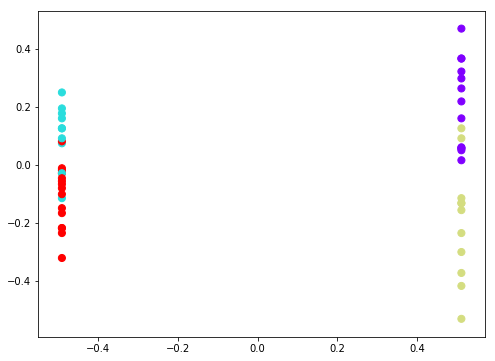

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df.values[:, 0],df.values[:,1], c=y_kmeans, s=50, cmap='rainbow') 
plt.show()

The results look a bit odd, most likely due to the categorical variable 'Type' that we converted earlier.
The k-means clustering algorithm is not directly applicable to categorical data as it is based on calculated distances. 
We attempt to remove 'Type' from the dataset to see the results for only true numerical values.

First we delete the column 'Type' from the dataset:

In [12]:
#delete column 'Type' from df
df = df.drop(['Type'], axis=1)

We then run the k-means algorithm again on the updated dataset:

In [13]:
#k-means clustering algorithm
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

The results are visualized below:

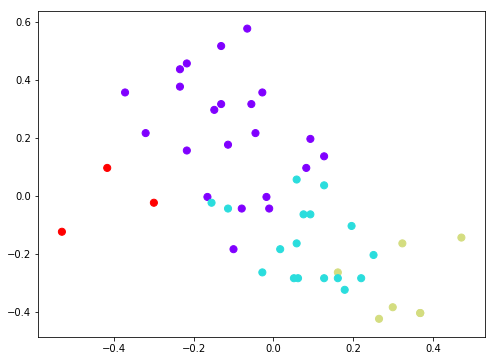

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df.values[:, 0],df.values[:,1], c=y_kmeans, s=50, cmap='rainbow') 
plt.show()

## Additional information

### Export dataset with results to csv

In case we want to analyze the results outside Python, we can include the k-means labels and the categorical variables, and then export the dataset to a csv file:

In [15]:
#add new columns
df['kmeans'] = kmeans.labels_
df['School'] = df_school
df['Type'] = df_type

In [16]:
#export to csv
df.to_csv('Colleges_and_uni_kmeans.csv')

### Convert Jupyter Notebook to PDF

A Jupyter Notebook can be converted to PDF through LaTeX.
This can be done in the terminal:

In [127]:
#jupyter nbconvert --to pdf coll_uni_optional.ipynb